<a href="https://colab.research.google.com/github/varalikadwivedi/Heart-Disease-Prediction-Model/blob/main/Heart_Disease_PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Import Libraries and Load Dataset</h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
heart_df=pd.read_csv("/content/UCIheartdisease.csv")

<h3>Data Pre-Processing</h3>

In [ ]:
heart_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


In [ ]:
heart_df.shape

(303, 14)

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<h3>Graphical Analysis</h3>

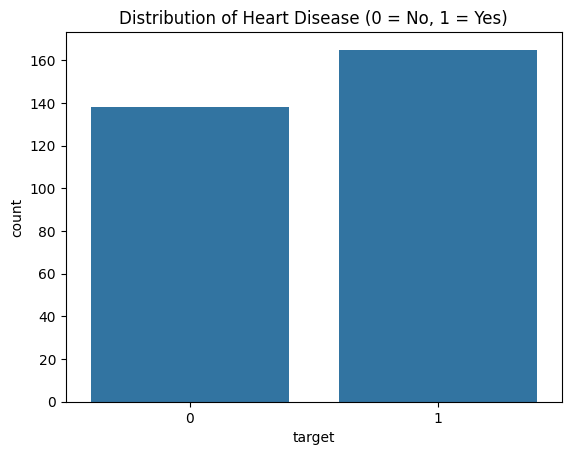

In [ ]:
sns.countplot(x='target', data=heart_df)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

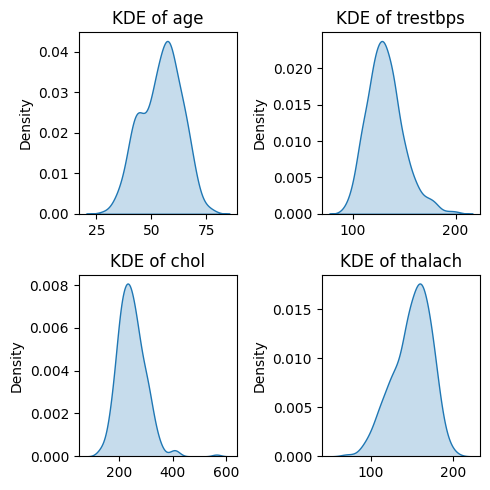

In [ ]:
cols = ['age', 'trestbps', 'chol', 'thalach']
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.kdeplot(data=heart_df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

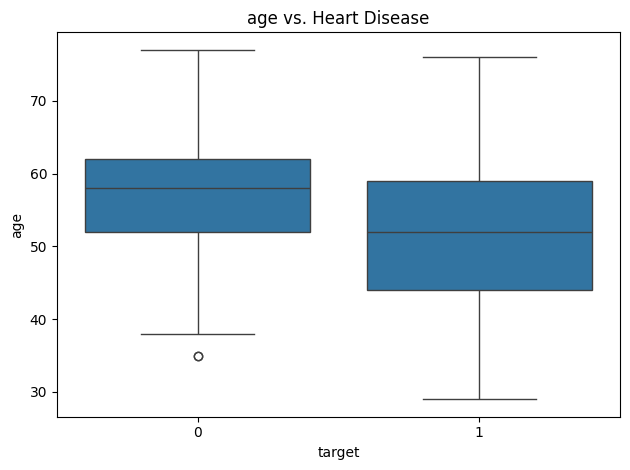

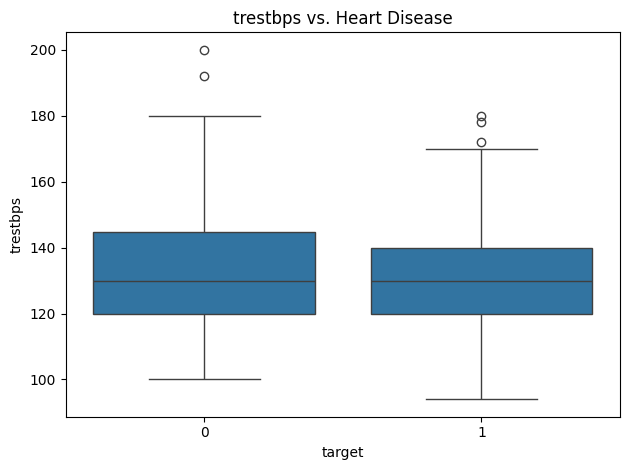

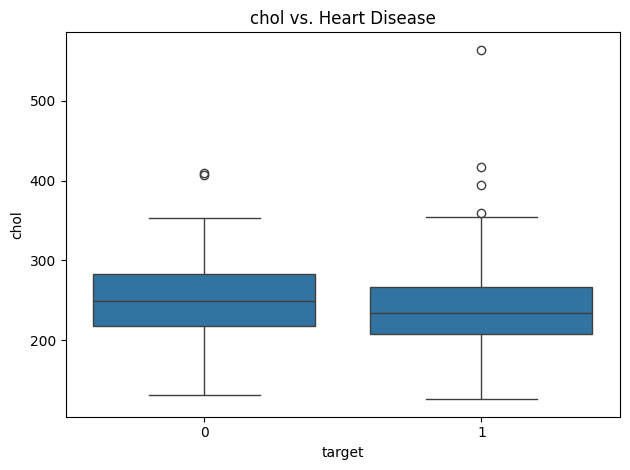

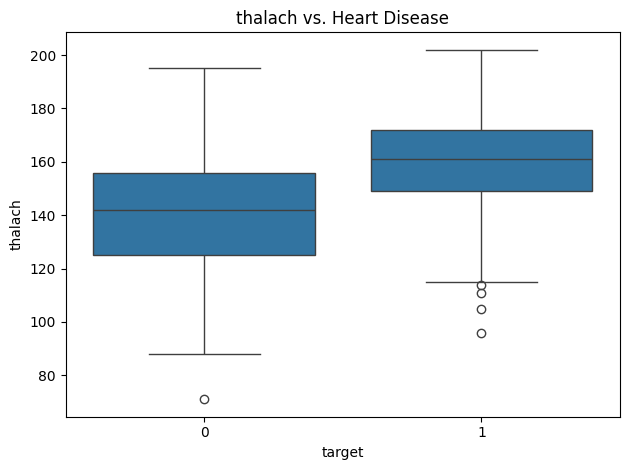

In [ ]:
for col in ['age', 'trestbps', 'chol', 'thalach']:
    sns.boxplot(x='target', y=col, data=heart_df)
    plt.title(f'{col} vs. Heart Disease')
    plt.tight_layout()
    plt.show()

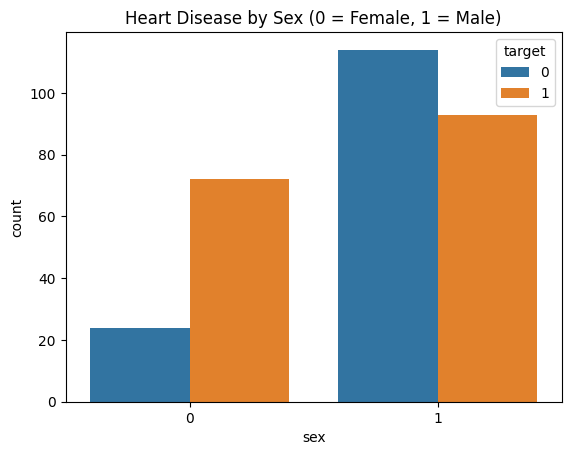

In [ ]:
sns.countplot(x='sex', hue='target', data=heart_df)
plt.title('Heart Disease by Sex (0 = Female, 1 = Male)')
plt.show()

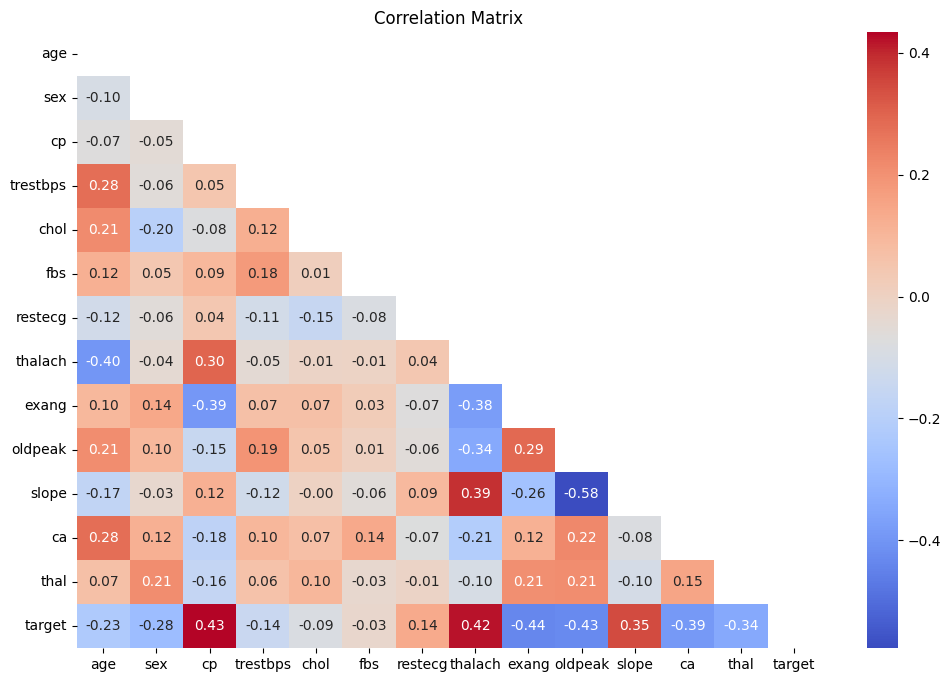

In [ ]:
corr_matrix=heart_df.corr()
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)
plt.title('Correlation Matrix')
plt.show()

<h4>Model Fit and Dataset spliting</h4>

In [ ]:
X = heart_df.drop(columns='target', axis=1)
y = heart_df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):


    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())

    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    model_score = pd.DataFrame(score, index=['precision_train', 'precision_test', 'recall_train', 'recall_test', 'acc_train', 'acc_test', 'F1_train', 'F1_test'], columns=['Score'])
    return model_score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Confusion Matrix:


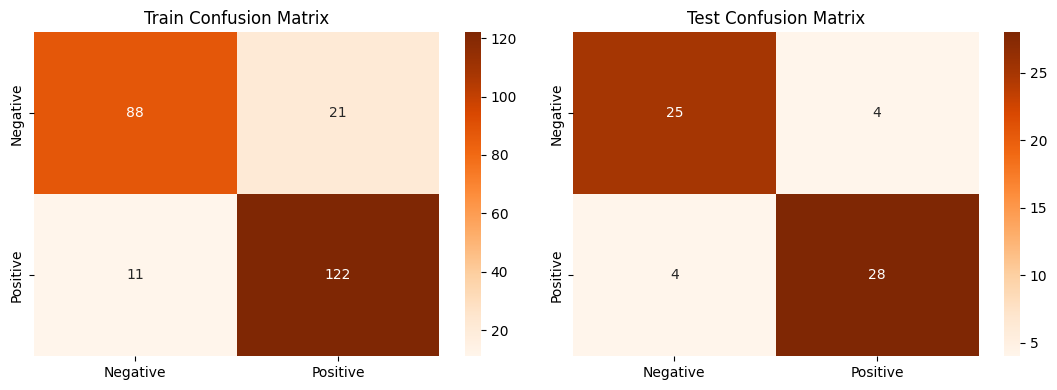


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.888889 | 0.807339 |   0.846154 | 109        |
| 1            |    0.853147 | 0.917293 |   0.884058 | 133        |
| accuracy     |    0.867769 | 0.867769 |   0.867769 |   0.867769 |
| macro avg    |    0.871018 | 0.862316 |   0.865106 | 242        |
| weighted avg |    0.869246 | 0.867769 |   0.866985 | 242        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.862069 | 0.862069 |   0.862069 | 29        |
| 1            |    0.875    | 0.875    |   0.875    | 32        |
| accuracy     |    0.868852 | 0.868852 |   0.868852 |  0.868852 |
| macro avg    |    0.868534 | 0.868534 |   0.868534 | 61        |
| weighted avg |    0.868852 | 0.868852 |   0.868852 | 61      

In [ ]:
lor=LogisticRegression(solver="lbfgs",max_iter=1000)
lor_scores=evaluate_model(lor, X_train, X_test, y_train, y_test)

In [ ]:
lor_scores

,Score
precision_train,0.865479
precision_test,0.868852
recall_train,0.863636
recall_test,0.868852
acc_train,0.863636
acc_test,0.868852
F1_train,0.862721
F1_test,0.868852


In [ ]:
cv_scores_lor = cross_val_score(lor, X_train, y_train, cv=5)
print(f"CV Accuracy: {cv_scores_lor.mean():.4f}")

CV Accuracy: 0.8139



Confusion Matrix:


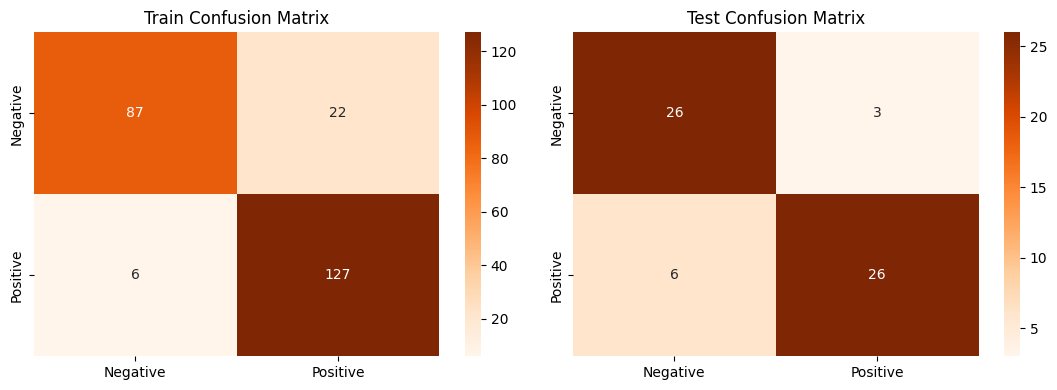


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.935484 | 0.798165 |   0.861386 | 109        |
| 1            |    0.852349 | 0.954887 |   0.900709 | 133        |
| accuracy     |    0.884298 | 0.884298 |   0.884298 |   0.884298 |
| macro avg    |    0.893916 | 0.876526 |   0.881048 | 242        |
| weighted avg |    0.889794 | 0.884298 |   0.882998 | 242        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.8125   | 0.896552 |   0.852459 | 29        |
| 1            |    0.896552 | 0.8125   |   0.852459 | 32        |
| accuracy     |    0.852459 | 0.852459 |   0.852459 |  0.852459 |
| macro avg    |    0.854526 | 0.854526 |   0.852459 | 61        |
| weighted avg |    0.856593 | 0.852459 |   0.852459 | 61      

In [ ]:
Decisiontreec=DecisionTreeClassifier(random_state=42,max_depth=4,min_samples_split=2)
dtc_scores=evaluate_model(Decisiontreec, X_train, X_test, y_train, y_test)

In [ ]:
dtc_scores

,Score
precision_train,0.889794
precision_test,0.856593
recall_train,0.884298
recall_test,0.852459
acc_train,0.884298
acc_test,0.852459
F1_train,0.882998
F1_test,0.852459


In [ ]:
cv_scores_dt = cross_val_score(Decisiontreec, X_train, y_train, cv=5)
print(f"CV Accuracy: {cv_scores_dt.mean():.4f}")

CV Accuracy: 0.7605



Confusion Matrix:


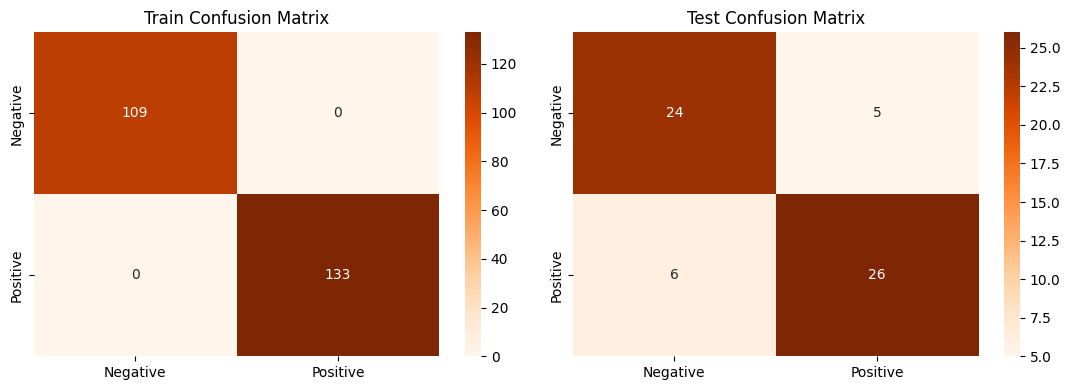


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       109 |
| 1            |           1 |        1 |          1 |       133 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       242 |
| weighted avg |           1 |        1 |          1 |       242 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.8      | 0.827586 |   0.813559 | 29        |
| 1            |    0.83871  | 0.8125   |   0.825397 | 32        |
| accuracy     |    0.819672 | 0.819672 |   0.819672 |  0.819672 |
| macro avg    |    0.819355 | 0.820043 |   0.819478 | 61        |
| weighted avg |    0.820307 | 0.819672 |   0.819769 | 61        |


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=11)
rf_scores=evaluate_model(rf_classifier, X_train, X_test, y_train, y_test)

In [ ]:
rf_scores

,Score
precision_train,1.000000
precision_test,0.820307
recall_train,1.000000
recall_test,0.819672
acc_train,1.000000
acc_test,0.819672
F1_train,1.000000
F1_test,0.819769


In [ ]:
cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print(f"CV Accuracy: {cv_scores_rf.mean():.4f}")

CV Accuracy: 0.8016


In [ ]:
total_scores=pd.concat([lor_scores,dtc_scores,rf_scores],axis=1)
model_scores=pd.DataFrame(total_scores)
model_scores.columns=['lor','dtc','rfc']
model_scores=model_scores.T
model_scores['cv_scores']=[cv_scores_lor.mean(),cv_scores_dt.mean(),cv_scores_rf.mean()]
model_scores

,precision_train,precision_test,recall_train,recall_test,acc_train,acc_test,F1_train,F1_test,cv_scores
lor,0.869246,0.868852,0.867769,0.868852,0.867769,0.868852,0.866985,0.868852,0.813861
dtc,0.889794,0.856593,0.884298,0.852459,0.884298,0.852459,0.882998,0.852459,0.760544
rfc,1.000000,0.820307,1.000000,0.819672,1.000000,0.819672,1.000000,0.819769,0.801616


<h4>Prediction</h4>

In [ ]:
feature_names=X.columns
def predict_ui(model,feature_names):
  user_input = {}
  for feature in feature_names:
    user_input[feature] = [float(input(f"Enter value for '{feature}': "))]

  user_df = pd.DataFrame(user_input)

  prediction = model.predict(user_df)

  print("\n--- Prediction Result ---")
  if (prediction[0]== 0):
    print('The Person does not have a Heart Disease')
  else:
    print('The Person has Heart Disease')
  return prediction


In [ ]:
heart_df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1


In [ ]:
predict_ui(lor,feature_names)

Enter value for 'age': 58
Enter value for 'sex': 0
Enter value for 'cp': 0
Enter value for 'trestbps': 170
Enter value for 'chol': 225
Enter value for 'fbs': 1
Enter value for 'restecg': 0
Enter value for 'thalach': 146
Enter value for 'exang': 1
Enter value for 'oldpeak': 2.8
Enter value for 'slope': 1
Enter value for 'ca': 2
Enter value for 'thal': 1

--- Prediction Result ---
The Person does not have a Heart Disease


array([0])

In [ ]:
predict_ui(Decisiontreec,feature_names)

Enter value for 'age': 54
Enter value for 'sex': 0
Enter value for 'cp': 2
Enter value for 'trestbps': 135
Enter value for 'chol': 304
Enter value for 'fbs': 1
Enter value for 'restecg': 1
Enter value for 'thalach': 170
Enter value for 'exang': 0
Enter value for 'oldpeak': 0.0
Enter value for 'slope': 2
Enter value for 'ca': 0
Enter value for 'thal': 2

--- Prediction Result ---
The Person has Heart Disease


array([1])